# Варіант 11

In [788]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [789]:
N = 250

In [790]:
m = 2
g = 10

In [791]:
T , y_true = make_blobs(n_samples=N, centers=g,
                       cluster_std=0.50, random_state=0)

In [792]:
centers = np.array([[random.uniform(-10,10),random.uniform(-10,10)] for i in range(g)])
centers

array([[ 1.22984286, -4.44918833],
       [-1.98485196, -1.06827513],
       [-5.54548037, -4.55802819],
       [-8.66484866, -9.1367248 ],
       [-9.17392686,  3.27665259],
       [-1.41670483,  6.99303463],
       [ 9.17100303, -1.17288291],
       [ 6.25818629, -1.52735075],
       [-7.91708079, -4.1678421 ],
       [-5.41746211,  6.55994166]])

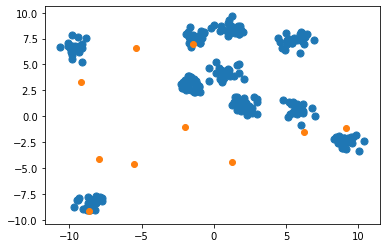

In [793]:
plt.scatter(T[:, 0], T[:, 1], s=50);
plt.scatter(centers[:,0], centers[:,1])

In [794]:
U = np.zeros((g,N)) # partition matrix

In [795]:
def d_euclid(a,b):
    return np.linalg.norm(a - b)

for i in range(N):
    _row = np.argmax([d_euclid(centers[j],T[i]) for j in range(g)])
    U[_row,i] = 1
U

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [796]:
def calc_centers():    
    for k in range(g):
        ci = np.zeros(m)  
        s = 0.0
        for i in range(N):
            ci += U[k,i]*T[i]
            #print('vertex',U[k,i]*T[i],i)
            s += U[k,i]
        #print(ci)
        if (math.isclose(s,0.0)):
            ci = np.zeros(m)
        else:
            ci = ci / s
        centers[k] = ci
calc_centers()

In [797]:
centers

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.13988928,  4.36320347],
       [ 9.08841561, -2.60706959],
       [ 0.        ,  0.        ],
       [-9.09485546, -0.87542773],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [798]:
#T

250


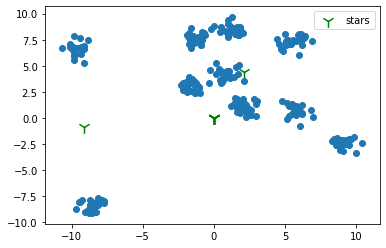

In [799]:
x = []
y = []
for i in range(len(centers)):
    x.append(centers[i][0])
    y.append(centers[i][1])
plt.scatter(x, y, label="stars", color="green",
            marker="1", s=160)

x = []
y = []
print(len(T))
for i in range(len(T)):
    x.append(T[i][0])
    y.append(T[i][1])
plt.scatter(x, y)               
plt.legend()
plt.show()

In [800]:
def recalculate():
    for i in range(N):
        m = d_euclid(T[i], centers[0])
        mark = 0
        for l in range(g):
            cur = d_euclid(T[i], centers[l])            
            if cur < m:
                m = cur
                mark = l
        U[:,i] = np.zeros(g)
        U[mark, i] = 1
recalculate()

In [801]:
for i in range(20):
    recalculate()
    calc_centers()

250


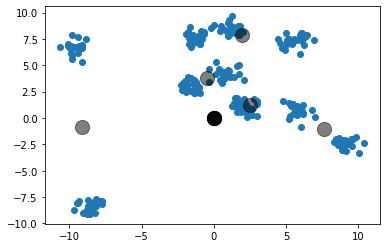

In [802]:
x = []
y = []
print(len(T))
for i in range(len(T)):
    x.append(T[i][0])
    y.append(T[i][1])
plt.scatter(x, y)

x = []
y = []
for i in range(len(centers)):
    x.append(centers[i][0])
    y.append(centers[i][1])
plt.scatter(x, y, c='black', s=200, alpha=0.5)
plt.show()

In [803]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=g)
kmeans.fit(T)
y_kmeans = kmeans.predict(T)

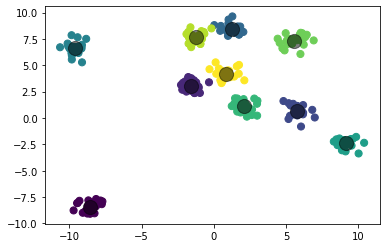

In [804]:
plt.scatter(T[:, 0], T[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);